In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
path = "/media/anuradhawick/data/For Blogging/on going/housesalesprediction/kc_house_data.csv"

dataset = pd.read_csv(path)

dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


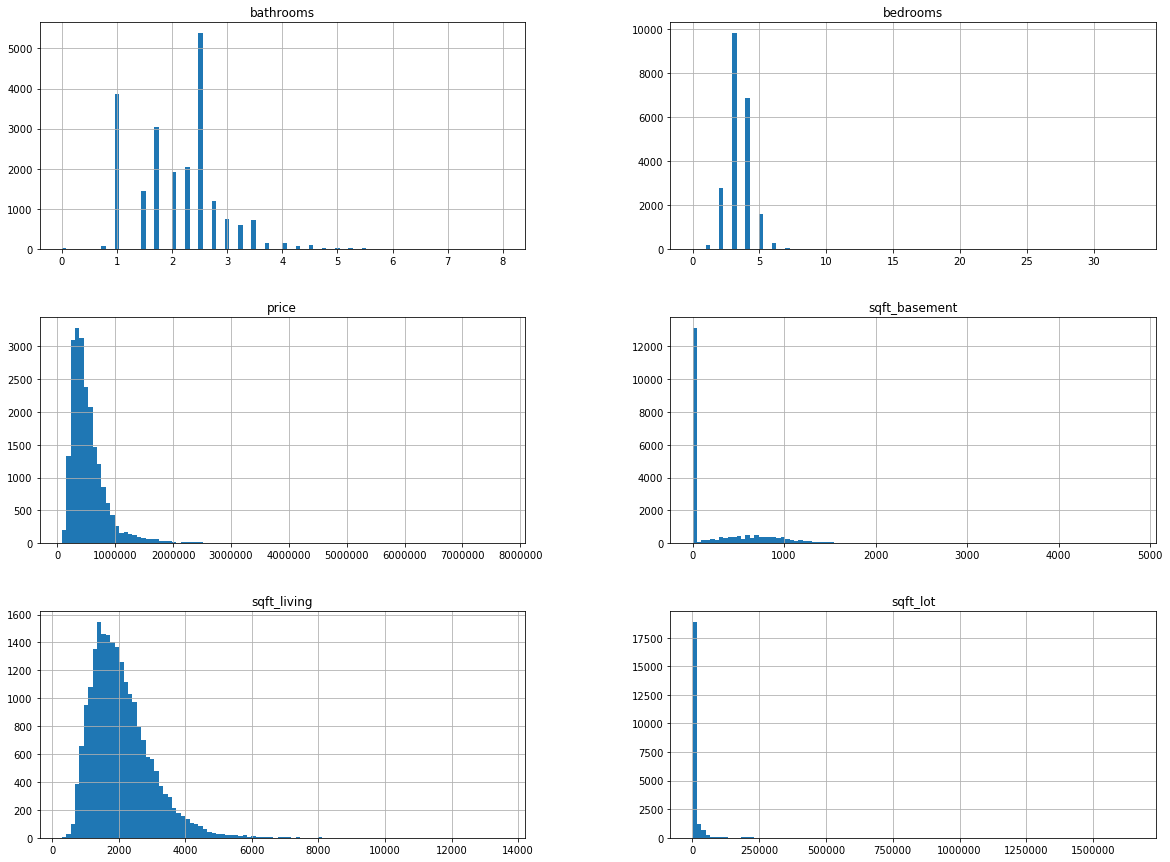

In [5]:
numeric_attributes = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "sqft_basement"]
dataset.hist(numeric_attributes, bins=100, figsize=(20,15))
plt.show()

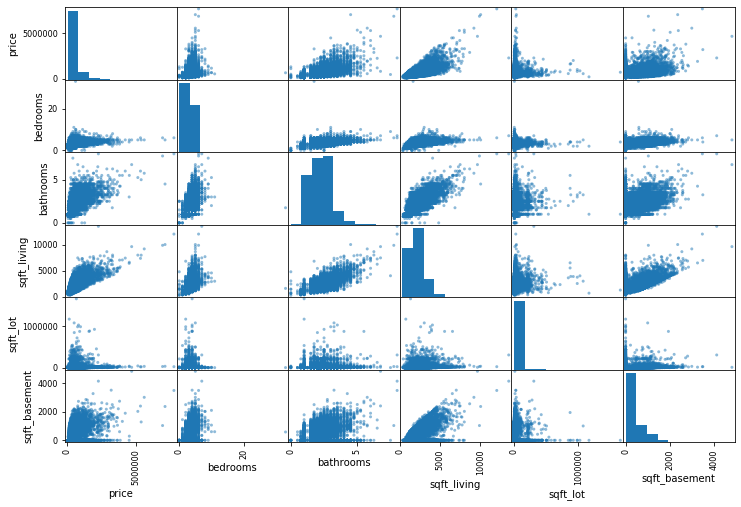

In [6]:
scatter_matrix(dataset[numeric_attributes], figsize=(12, 8))
plt.show()

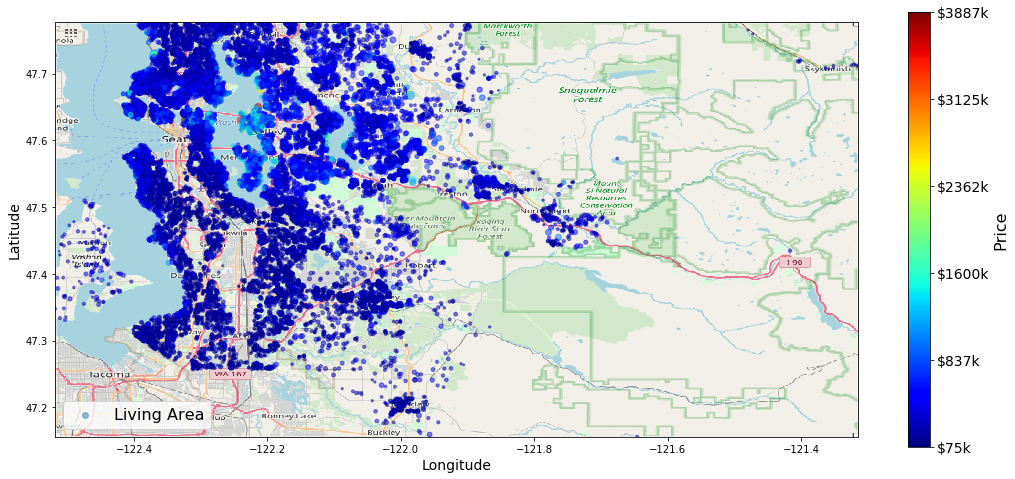

In [21]:
region = [dataset["long"].min(), dataset["long"].max(), dataset["lat"].min(), dataset["lat"].max()]


seattle_img=mpimg.imread("/media/anuradhawick/data/For Blogging/on going/seattle.png")

ax = dataset.plot(kind="scatter", x="long", y="lat", figsize=(18,8),
                       s=dataset['sqft_living']/200, label="Living Area",
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.5,
                      )
plt.imshow(seattle_img, extent=region, alpha=1, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = dataset["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v)/1000) for v in tick_values], fontsize=14)
cbar.set_label('Price', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [8]:
dataset_selected = dataset[["sqft_living", "sqft_lot", "sqft_basement", "sqft_above", "bedrooms", "bathrooms", "grade", "floors"]] 
scaler_data = StandardScaler()
dataset_selected = scaler_data.fit_transform(dataset_selected)
dataset_selected

array([[-0.97983502, -0.22832133, -0.65868104, ..., -1.44746357,
        -0.55883575, -0.915427  ],
       [ 0.53363434, -0.18988538,  0.2451414 , ...,  0.1756067 ,
        -0.55883575,  0.93650577],
       [-1.42625404, -0.12329847, -0.65868104, ..., -1.44746357,
        -1.40958711, -0.915427  ],
       ...,
       [-1.15404732, -0.33213703, -0.65868104, ..., -1.77207762,
        -0.55883575,  0.93650577],
       [-0.52252773, -0.30707641, -0.65868104, ...,  0.50022075,
         0.29191561,  0.93650577],
       [-1.15404732, -0.33875227, -0.65868104, ..., -1.77207762,
        -0.55883575,  0.93650577]])

In [9]:
scaler_labels = StandardScaler()

dataset_labels = dataset[["price"]]
dataset_labels = scaler_labels.fit_transform(dataset_labels)
dataset_labels

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(dataset_selected, dataset_labels, test_size=0.2, random_state=42)

In [11]:
l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

prediction_lr = l_reg.predict(x_test)
mse = mean_squared_error(y_test, prediction_lr)
rmse = np.sqrt(mse)
print(rmse)

0.7064062405754441


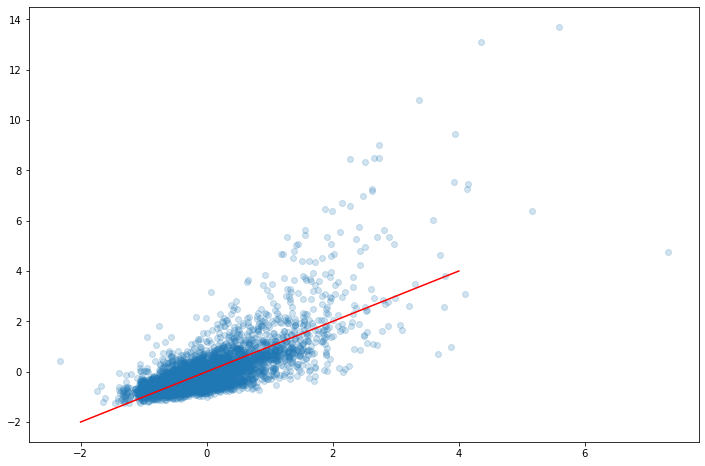

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(prediction_lr, y_test, alpha=0.2)
plt.plot(np.arange(-2, 5), np.arange(-2,5), 'r')

In [23]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train, y_train)

prediction_dt = dt_reg.predict(x_test)
mse = mean_squared_error(y_test, prediction_dt)
rmse = np.sqrt(mse)
print(rmse)

0.8650106652706725


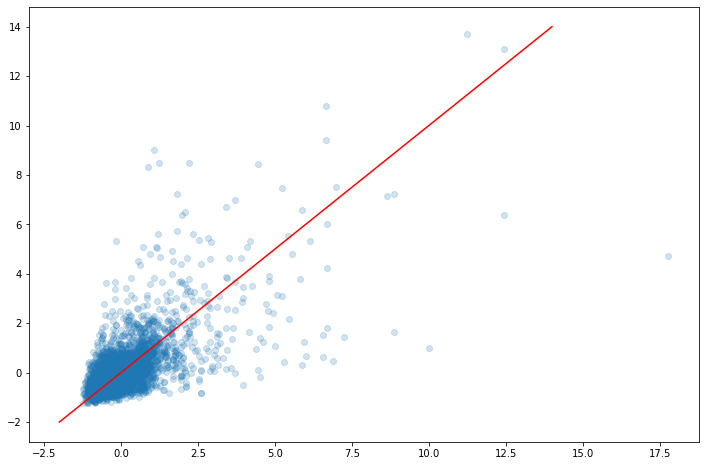

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(prediction_dt, y_test, alpha=0.2)
plt.plot(np.arange(-2, 15), np.arange(-2, 15), 'r')

In [15]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train.ravel())

prediction_rf = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, prediction_rf)
rmse = np.sqrt(mse)
print(rmse)

0.6750608828039147


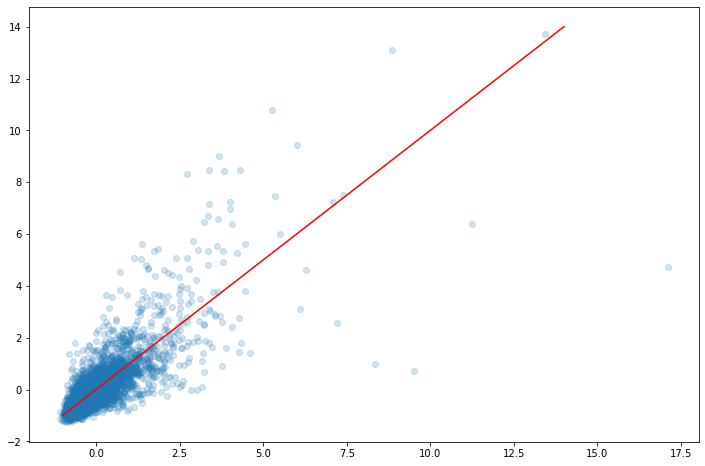

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(prediction_rf, y_test, alpha=0.2)
plt.plot(np.arange(-1, 15), np.arange(-1, 15), 'r')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


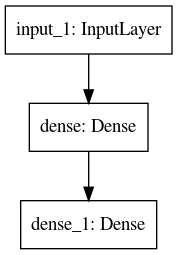

In [17]:
i = tf.keras.layers.Input(8)
ix = tf.keras.layers.Dense(16, activation='relu')(i)
z = tf.keras.layers.Dense(1)(ix)

model = tf.keras.Model(i, z)
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model.summary()
tf.keras.utils.plot_model(model)

In [18]:
model.fit(x_train, y_train, epochs=50)

Train on 17290 samples
Epoch 1/50
17290/17290 [==============================] - 2s 94us/sample - loss: 0.4596 - mse: 0.4596
Epoch 2/50
17290/17290 [==============================] - 1s 32us/sample - loss: 0.3898 - mse: 0.3898
Epoch 3/50
17290/17290 [==============================] - 1s 34us/sample - loss: 0.3848 - mse: 0.3848
Epoch 4/50
17290/17290 [==============================] - 0s 28us/sample - loss: 0.3778 - mse: 0.3778
Epoch 5/50
17290/17290 [==============================] - 0s 22us/sample - loss: 0.3769 - mse: 0.3769
Epoch 6/50
17290/17290 [==============================] - 0s 23us/sample - loss: 0.3724 - mse: 0.3724
Epoch 7/50
17290/17290 [==============================] - 0s 22us/sample - loss: 0.3713 - mse: 0.3713
Epoch 8/50
17290/17290 [==============================] - 0s 24us/sample - loss: 0.3706 - mse: 0.3706
Epoch 9/50
17290/17290 [==============================] - 0s 22us/sample - loss: 0.3693 - mse: 0.3693
Epoch 10/50
17290/17290 [==============================] - 

In [19]:
prediction_nn = model.predict(x_test)
mse = mean_squared_error(y_test, prediction_nn)
rmse = np.sqrt(mse)
print(rmse)

0.6397470572678363


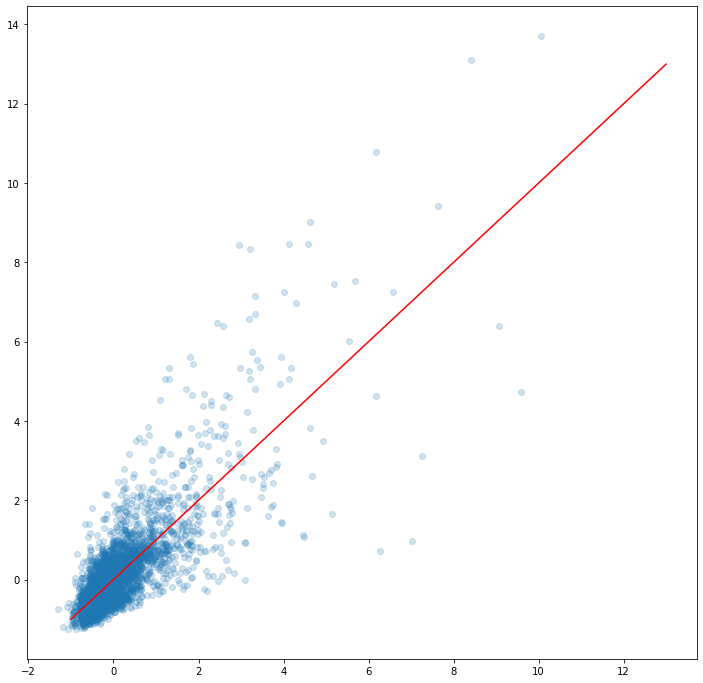

In [20]:
plt.figure(figsize=(12,12))
plt.scatter(prediction_nn, y_test, alpha=0.2)
plt.plot(np.arange(-1, 14), np.arange(-1, 14), 'r')